# Linear Regression Practice

In [164]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoLarsCV, Ridge

1. Reading Data

In [165]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data = pd.concat([data_train,data_test],sort = True)
data.shape

(2919, 81)

In [166]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


2. Visualizing Data

In [167]:
%matplotlib inline

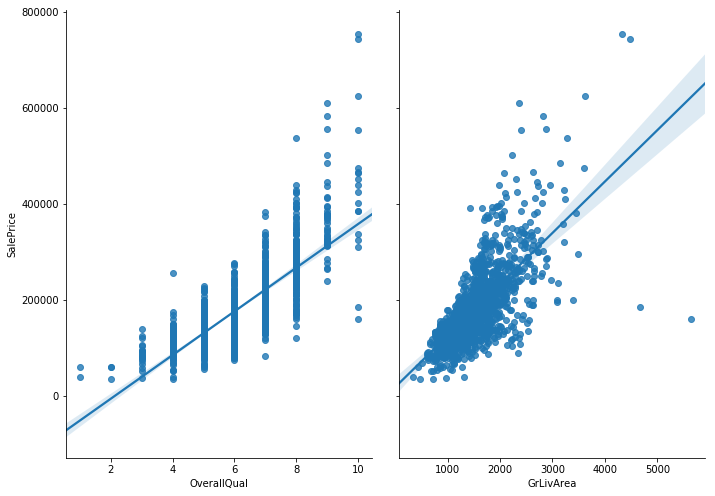

In [168]:
sns.pairplot(data, x_vars=['OverallQual', 'GrLivArea'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg')

3. Checking correlation

In [169]:
traincorr = data.corr()['SalePrice']
traincorr = pd.DataFrame(traincorr)
traincorr.columns = ["Corr"]
traincorr_ordered = traincorr.sort_values(by=['Corr'],ascending=False)
traincorr_ordered.head(20)

,Corr
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


4. Checking mising data

In [170]:
countmissing = data.isnull().sum().sort_values(ascending=False)
percentmissing = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
data_miss = pd.concat([countmissing,percentmissing], axis=1)
data_miss.columns = ["count","%"]
count = data_miss['count'] > 0
data_miss[count]

,count,%
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageCond,159,0.054471
GarageQual,159,0.054471


4. Filling missing data

If missing data is a short amount, values were set with most common values

In [171]:
data['Electrical'] = data.Electrical.fillna("SBrkr")
data['MasVnrType'] = data.MasVnrType.fillna("None")
data['MSZoning'] = data.MasVnrType.fillna("RL")

Float values

In [172]:
data['MasVnrArea']= data.MasVnrArea.fillna(data.MasVnrArea.mean())
data['GarageArea']= data.GarageArea.fillna(data.GarageArea.mean())
data['BsmtUnfSF']= data.BsmtUnfSF.fillna(data.BsmtUnfSF.mean())
data['BsmtFinSF2']= data.BsmtFinSF2.fillna(data.BsmtFinSF2.mean())
data['BsmtFinSF1']= data.BsmtFinSF1.fillna(data.BsmtFinSF1.mean())

Integer values

In [173]:
data['BsmtFullBath']= data.BsmtFullBath.fillna(data.BsmtFullBath.median())
data['BsmtHalfBath']= data.BsmtHalfBath.fillna(data.BsmtHalfBath.median())
data['GarageCars']= data.GarageCars.fillna(data.GarageCars.median())

In [174]:
data.GarageYrBlt.fillna(data.YearBuilt, inplace=True)
data.TotalBsmtSF.fillna(data['1stFlrSF'], inplace=True)

In [175]:
data['LotFrontage']= data.LotFrontage.fillna(data.LotArea)
data['LotFrontage']= data['LotFrontage'].astype(int)

5. Creating new features based on more correlated ones

In [176]:
# Total Living Area
Livingtotalsf = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GarageArea'] + data['WoodDeckSF'] + data['OpenPorchSF']
data['LivingTotalAreaSF'] = Livingtotalsf

# Total Living Area percentage
data['PercentSQtoLot'] = data['LivingTotalAreaSF'] / data['LotArea']

# Total amount of bathrooms withing the building, including full and half
data['TotalBaths'] = data['BsmtFullBath'] + data['BsmtHalfBath'] + data['HalfBath'] + data['FullBath']

# Percentage of total rooms are bedrooms
data['PercentBedrmtoRooms'] = data['BedroomAbvGr'] / data['TotRmsAbvGrd']

# Time since last remodel in years
data['YearsSinceRemodel'] = 2018 - ((data['YearRemodAdd'] - data['YearBuilt']) + data['YearBuilt'])

In [177]:
traincorr = data.corr()['SalePrice']
traincorr = pd.DataFrame(traincorr)
traincorr.columns = ["Corr"]
traincorr_ordered = traincorr.sort_values(by=['Corr'],ascending=False)
traincorr_ordered.head(30)

,Corr
SalePrice,1.000000
LivingTotalAreaSF,0.815688
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
TotalBaths,0.613005
1stFlrSF,0.605852
FullBath,0.560664


6. Selecting final features

In [178]:
price = data['SalePrice']

neigh = data[['Neighborhood','MSZoning','MSSubClass','BldgType','HouseStyle']]

dates = data[['YearBuilt','YearRemodAdd','GarageYrBlt','YearsSinceRemodel']]

quacon = data[['ExterQual','BsmtQual','PoolQC','Condition1','Condition2','SaleCondition',
                  'BsmtCond','ExterCond','GarageCond','KitchenQual','GarageQual','HeatingQC','OverallQual','OverallCond']]

features =  data[['Foundation','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                     'MiscFeature','PavedDrive','Utilities',
                     'Heating','CentralAir','Electrical','Fence']]

sqfoot = data[['LivingTotalAreaSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
                  'GarageArea','WoodDeckSF','OpenPorchSF','LotArea','PercentSQtoLot','LowQualFinSF']]

roomfeatcount = data[['PercentBedrmtoRooms','TotalBaths','FullBath','HalfBath',
                         'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','EnclosedPorch']]


In [179]:
X = pd.concat([neigh,dates,quacon,features,sqfoot,roomfeatcount], axis=1)

In [180]:
X.shape

(2919, 55)

In [181]:
data = pd.get_dummies(data)

In [182]:
data.shape

(2919, 294)

7. Setting final data (train/test)

In [183]:
train_X = data[data['SalePrice'].notnull()]
del train_X['SalePrice']
test_X =  data[data['SalePrice'].isnull()]
del test_X['SalePrice']

In [184]:
X = train_X
X.shape

(1460, 293)

In [185]:
y = price[price.notnull()]
y.shape

(1460,)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [187]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 293)
(365, 293)
(1095,)
(365,)


8. Linear Regression

In [188]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoLarsCV, Ridge

#linreg = LinearRegression()
linreg = Ridge()
#linreg = LassoLarsCV()

linreg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [189]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

1156002.22347
[  5.11274750e+00   1.29376394e+01   2.76461118e+01  -4.50571260e+03
   8.56121990e-01  -1.27840725e+00   1.16307536e+02  -2.27516901e+03
  -5.97935757e+00   1.93688988e+01   4.67582536e+03   4.02989623e+03
   9.74574026e-01   9.33928172e+03  -7.92731141e+01   2.12968218e+01
   1.20820987e+03  -4.20190280e-01  -1.57718693e+04   5.61203936e-01
   4.46701394e-02   3.24644808e+00  -3.57387230e+01   1.23437796e+01
   5.28716579e-01  -2.76146206e+02  -6.94817910e+00   5.37402742e+03
   6.74081886e+03  -7.84640108e+00   3.86568193e+01   4.47249644e+03
  -6.40162932e+00   7.99088020e+00   1.96563758e+02   1.97025467e+01
  -7.60863114e+02   1.36660351e+01  -6.44061886e+03   3.07924463e+03
   2.06086631e+04  -1.97025467e+01   3.49024161e+02   1.02652326e+04
   1.06963786e+04   4.85334433e+03  -2.09264241e+02  -7.09072312e+03
  -8.24973561e+03   8.75156135e+02   1.58201188e+03   5.71780640e+03
   5.03091839e+03   4.32664582e+03   2.13687686e+04   5.35965025e+02
  -2.71933198e+03   

8. Predicting

In [190]:
y_pred = linreg.predict(X_test)

9. Cheking RMSE

In [191]:
y_test.shape, y_pred.shape

((365,), (365,))

In [192]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

29433.2550486


In [193]:
print (linreg.score( X_train , y_train ) , linreg.score( X_test , y_test ))

0.92033999991 0.870953809731


10. Predicting for test data

In [163]:
id = test_X['Id']
test_result = linreg.predict(test_X)

output = pd.DataFrame( { 'id': id , 'SalePrice': test_result} )
output = output[['id', 'SalePrice']]

output.to_csv("test_result.csv", index = False)

11. My Own linear Regression Algoritm

In [197]:
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [204]:
X = data[['OverallQual','GrLivArea','GarageArea']]
y = data['SalePrice']

X.shape, y.shape

((1460, 3), (1460,))

In [205]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [206]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1095, 3), (365, 3), (1095,), (365,))

In [209]:
alpha = 0.0000001
lenght = len(y_train)
a = [0,0,0]
sum = [0,0,0]
rmse = 10

In [210]:
y = 0 + 0 * Xtrain

sum[0] = sum([value + ytrain[i] for i, value in enumerate(y)])
a[0] = a[0] - alpha * 2 * sum[0]/lenght

for x in range(1,len(a)):    
    sum[x] = sum([(value + ytrain[i]) * Xtrain[i] for i, value in enumerate(y)])
    a[x] = a[x] - alpha * 2 * sum[x]/lenght



TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

In [ ]:
a

In [ ]:
y_prediction = a0 + a1 * x_test
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
print(rmse)

10. References

https://medium.com/africa-creates/predicting-house-prices-using-linear-regression-fe699d091e04
https://medium.com/@datalesdatales/predicting-house-prices-with-linear-regression-595422992c48
https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a
https://towardsdatascience.com/house-prices-and-regressions-7adf696053d6